In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import cv2

In [4]:
df = pd.read_csv('../data/full_data.csv')
print(df.head())

   frame_index  total_objects  median_motion  rating  percentage_blue  \
0           36             49       0.297892       1         0.962963   
1           53             45      -0.075178       1         0.962963   
2          135             69       0.270907       1         0.962963   
3          140             54       0.483137       1         0.962963   
4          161             58       0.288414       1         0.962651   

   percentage_green  percentage_brown  
0          0.000000          0.038913  
1          0.000000          0.015907  
2          0.000000          0.019711  
3          0.000000          0.021090  
4          0.000041          0.026733  


In [9]:
# get the x (the features) from the dataframe
x = df.drop(['rating'], axis=1).values

# get the y (the rating column) from the dataframe
y = df['rating'].values

accuracy = []

# perform multiple different random states to see if the accuracy changes
for i in range(0, 10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    classifier = make_pipeline(
        StandardScaler(),
        SGDClassifier(max_iter=1000, tol=1e-3, loss='perceptron')
    )

    classifier.fit(x_train, y_train)

    test_results = classifier.predict(x_test)
    train_results = classifier.predict(x_train)

    test_score = metrics.accuracy_score(y_test, test_results)
    train_score = metrics.accuracy_score(y_train, train_results)

    print('test', test_score, 'train', train_score)

    accuracy.append(test_score)

print('average accuracy', np.average(accuracy))
print('std accuracy', np.std(accuracy))

test 0.7659574468085106 train 0.8602150537634409
test 0.9574468085106383 train 0.9086021505376344
test 0.9148936170212766 train 0.9408602150537635
test 0.8723404255319149 train 0.9086021505376344
test 0.9361702127659575 train 0.9193548387096774
test 0.9574468085106383 train 0.9086021505376344
test 0.9148936170212766 train 0.9354838709677419
test 0.9148936170212766 train 0.9193548387096774
test 0.8723404255319149 train 0.9516129032258065
test 0.6170212765957447 train 0.7043010752688172
average accuracy 0.8723404255319149
std accuracy 0.10024867225012551


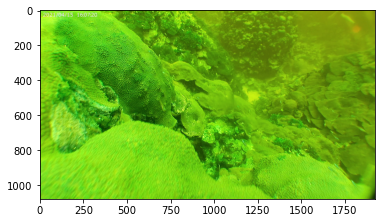

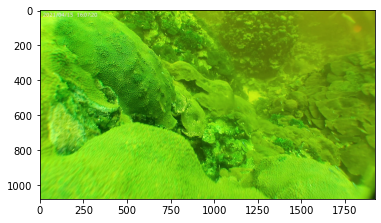

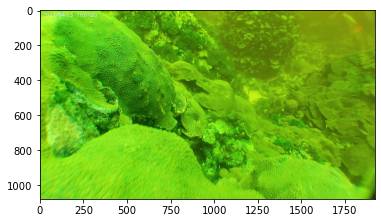

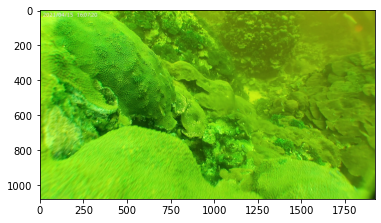

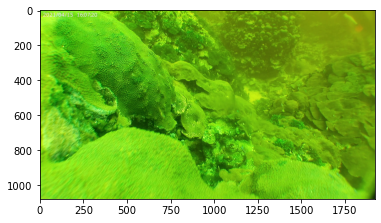

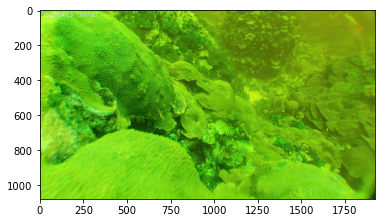

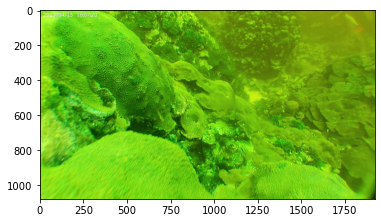

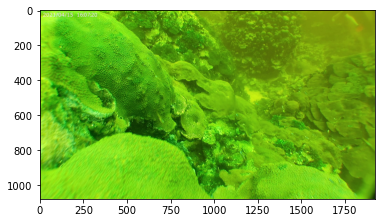

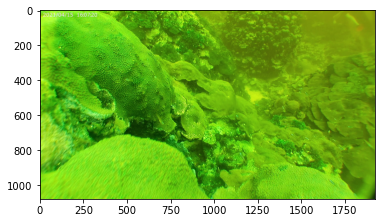

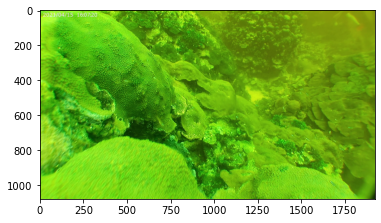

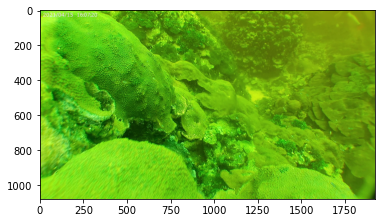

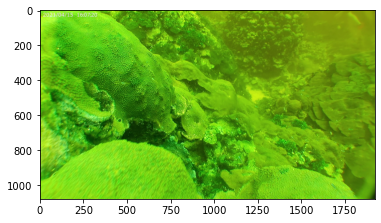

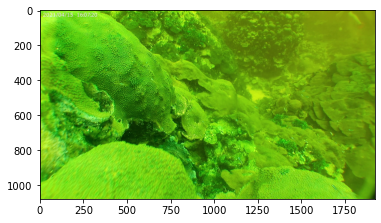

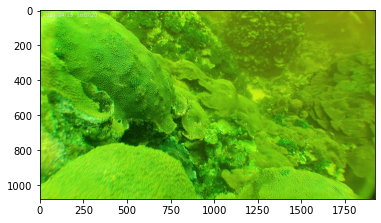

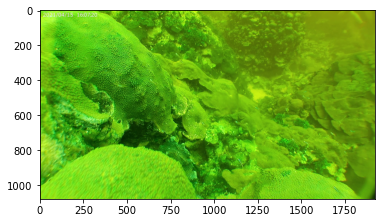

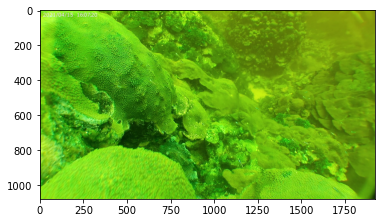

KeyboardInterrupt: 

In [9]:
capture = cv2.VideoCapture('../test_original.mp4')
capture.set(cv2.CAP_PROP_FPS, 0.05)

while True:
    ret, frame = capture.read()
    if not ret:
        break

    # cv2.imshow('frame', frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break